Regression

This is dataset containing over 21613 houses and their characteristics, the goal is to find the best model to predict a house’s price : 



1. Explore this dataset using what you have learned in data preprocessing and data visualization 

2. Write a paragraph selecting the most important features (feature selection). 

3. Split your dataset into a training set and a testing set. 

4. Apply Linear regression to your training set. 

5. Plot the linear regression. 

5. Measure the performance of linear regression using the testing set. 

6. Apply multi-linear regression and compare it to the linear model. 

7. Apply Polynomial regression and compare it to the linear and multilinear regression. 



Note: Every result has to be interpreted and justified (write your interpretations in a markdown).

In [70]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

After importing the necessary libraries we will initiate by reading the dataset

In [71]:
df = pd.read_csv (r"C:\Users\Mehdi Zribi\Desktop\AI\13- ML Regression Cheekpoint\kc_house_data.csv",sep=",")

In [72]:
kc_house=pd.DataFrame(df)
kc_house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [73]:
kc_house.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [74]:
kc_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Let's now have look on scaler aspect  

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

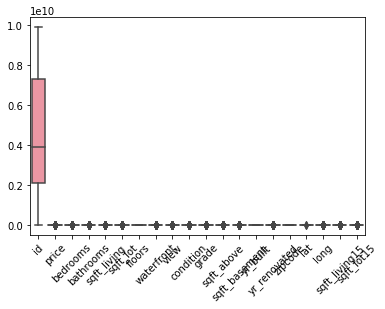

In [75]:
sns.boxplot(data=kc_house)
plt.xticks(rotation=45)

AS a second step we will standardise the data

In [76]:
kc_house.head(0)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [77]:
kc_house.drop(['date'],axis=1,inplace=True)
kc_house.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [78]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
kc_house["id"] = scaler.fit_transform(kc_house[["id"]].values)
kc_house["price"] = scaler.fit_transform(kc_house[["price"]].values)
kc_house["bedrooms"] = scaler.fit_transform(kc_house[["bedrooms"]].values)
kc_house["bathrooms"] = scaler.fit_transform(kc_house[["bathrooms"]].values)
kc_house["sqft_living"] = scaler.fit_transform(kc_house[["sqft_living"]].values)
kc_house["sqft_lot"] = scaler.fit_transform(kc_house[["sqft_lot"]].values)
kc_house["floors"] = scaler.fit_transform(kc_house[["floors"]].values)
kc_house["waterfront"] = scaler.fit_transform(kc_house[["waterfront"]].values)
kc_house["view"] = scaler.fit_transform(kc_house[["view"]].values)
kc_house["condition"] = scaler.fit_transform(kc_house[["condition"]].values)
kc_house["grade"] = scaler.fit_transform(kc_house[["grade"]].values)
kc_house["sqft_above"] = scaler.fit_transform(kc_house[["sqft_above"]].values)
kc_house["sqft_basement"] = scaler.fit_transform(kc_house[["sqft_basement"]].values)
kc_house["yr_built"] = scaler.fit_transform(kc_house[["yr_built"]].values)
kc_house["yr_renovated"] = scaler.fit_transform(kc_house[["yr_renovated"]].values)
kc_house["zipcode"] = scaler.fit_transform(kc_house[["zipcode"]].values)
kc_house["lat"] = scaler.fit_transform(kc_house[["lat"]].values)
kc_house["long"] = scaler.fit_transform(kc_house[["long"]].values)
kc_house["sqft_living15"] = scaler.fit_transform(kc_house[["sqft_living15"]].values)
kc_house["sqft_lot15"] = scaler.fit_transform(kc_house[["sqft_lot15"]].values)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

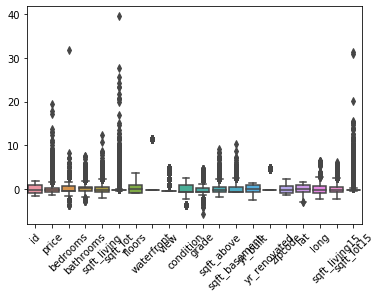

In [79]:
sns.boxplot(data=kc_house)
plt.xticks(rotation=45)

(array([-1000000.,        0.,  1000000.,  2000000.,  3000000.,  4000000.,
         5000000.,  6000000.,  7000000.,  8000000.,  9000000.]),
 <a list of 11 Text xticklabel objects>)

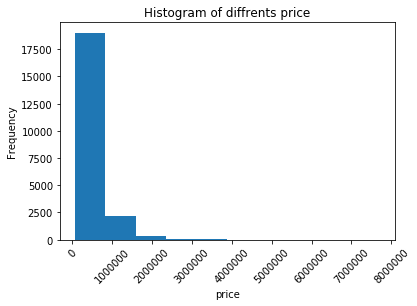

In [80]:
plt.title("Histogram of diffrents price")
plt.xlabel("price")
df["price"].plot.hist()
plt.xticks(rotation=45)

(array([1880., 1900., 1920., 1940., 1960., 1980., 2000., 2020., 2040.]),
 <a list of 9 Text xticklabel objects>)

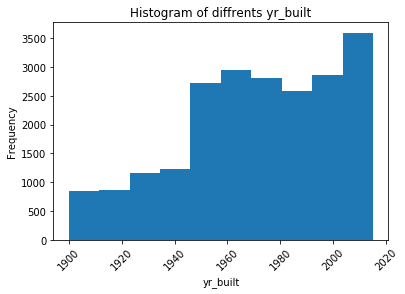

In [81]:
plt.title("Histogram of diffrents yr_built")
plt.xlabel("yr_built")
df["yr_built"].plot.hist()
plt.xticks(rotation=45)

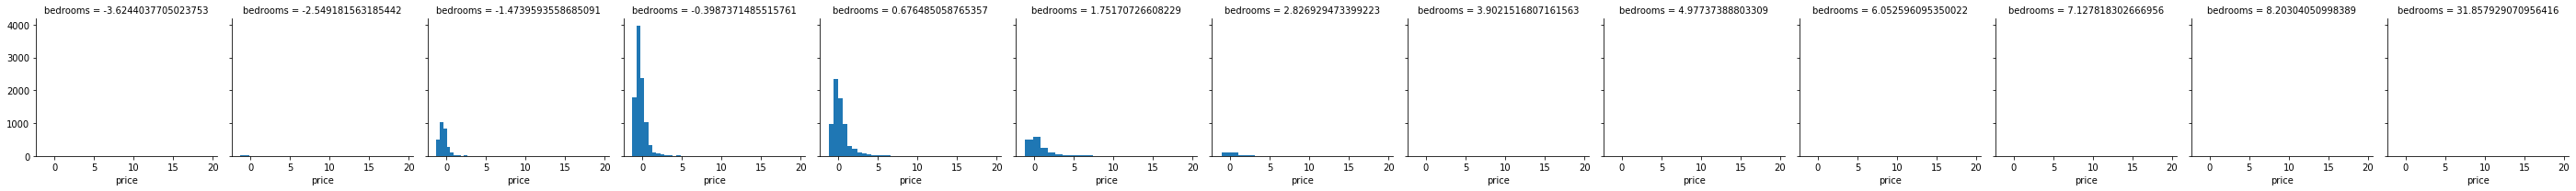

In [82]:
import matplotlib.pyplot as plt
g=sns.FacetGrid(kc_house,col='bedrooms')
g.map(plt.hist,'price' , bins = 20)

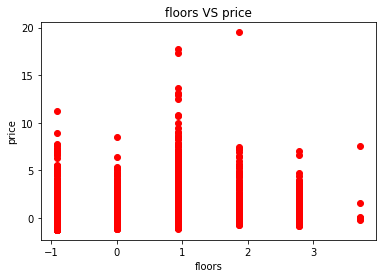

In [83]:
plt.scatter(kc_house['floors'] , kc_house ['price'] ,color = 'red')
plt.title('floors VS price' )
plt.xlabel('floors')
plt.ylabel('price')
plt.show()

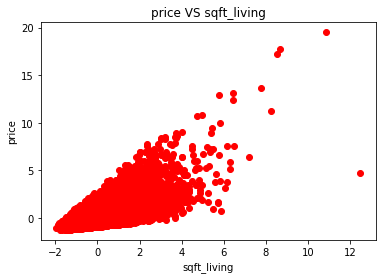

In [84]:
plt.scatter(kc_house['sqft_living'] , kc_house ['price'] ,color = 'red')
plt.title('price VS sqft_living' )
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

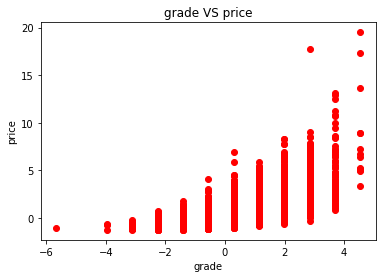

In [85]:
plt.scatter(kc_house['grade'] , kc_house ['price'] ,color = 'red')
plt.title('grade VS price' )
plt.xlabel('grade')
plt.ylabel('price')
plt.show()

In [86]:
corr = kc_house.corr()
corr.style.background_gradient(cmap="coolwarm").set_precision(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.00,-0.02,0.00,0.01,-0.01,-0.13,0.02,-0.00,0.01,-0.02,0.01,-0.01,-0.01,0.02,-0.02,-0.01,-0.00,0.02,-0.00,-0.14
price,-0.02,1.00,0.31,0.53,0.70,0.09,0.26,0.27,0.40,0.04,0.67,0.61,0.32,0.05,0.13,-0.05,0.31,0.02,0.59,0.08
bedrooms,0.00,0.31,1.00,0.52,0.58,0.03,0.18,-0.01,0.08,0.03,0.36,0.48,0.30,0.15,0.02,-0.15,-0.01,0.13,0.39,0.03
bathrooms,0.01,0.53,0.52,1.00,0.75,0.09,0.50,0.06,0.19,-0.12,0.66,0.69,0.28,0.51,0.05,-0.20,0.02,0.22,0.57,0.09
sqft_living,-0.01,0.70,0.58,0.75,1.00,0.17,0.35,0.10,0.28,-0.06,0.76,0.88,0.44,0.32,0.06,-0.20,0.05,0.24,0.76,0.18
sqft_lot,-0.13,0.09,0.03,0.09,0.17,1.00,-0.01,0.02,0.07,-0.01,0.11,0.18,0.02,0.05,0.01,-0.13,-0.09,0.23,0.14,0.72
floors,0.02,0.26,0.18,0.50,0.35,-0.01,1.00,0.02,0.03,-0.26,0.46,0.52,-0.25,0.49,0.01,-0.06,0.05,0.13,0.28,-0.01
waterfront,-0.00,0.27,-0.01,0.06,0.10,0.02,0.02,1.00,0.40,0.02,0.08,0.07,0.08,-0.03,0.09,0.03,-0.01,-0.04,0.09,0.03
view,0.01,0.40,0.08,0.19,0.28,0.07,0.03,0.40,1.00,0.05,0.25,0.17,0.28,-0.05,0.10,0.08,0.01,-0.08,0.28,0.07
condition,-0.02,0.04,0.03,-0.12,-0.06,-0.01,-0.26,0.02,0.05,1.00,-0.14,-0.16,0.17,-0.36,-0.06,0.00,-0.01,-0.11,-0.09,-0.00


One of the most important features are definitly the sqft_living which should be the first features, as a second features level logically the grade, sqft_above, bathrooms are classified in the next level, however the remaining features; sqft_living15 , bedrooms can be considered as importance' bottom line.  

Since we know now the correlation between the features let's start train, test and split the dataset

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [88]:
x = kc_house['sqft_living']. values[:,np.newaxis]
y = kc_house ['price'].values

x_train, x_test, y_train , y_test , = train_test_split(x,y,test_size =0.2,random_state=40)


In [89]:
LR_model = LinearRegression()
LR_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [90]:
print (LR_model.coef_)

[0.70659225]


Let's plot the linear regression now

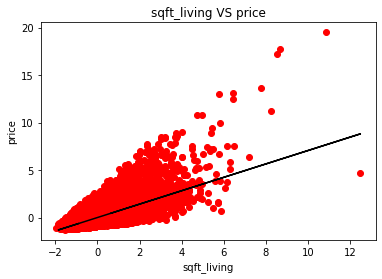

In [91]:
plt.scatter(kc_house['sqft_living'] , kc_house ['price'] ,color = 'red')
plt.title('sqft_living VS price' )
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.plot(x_train,LR_model.predict(x_train),color="black")
plt.show()

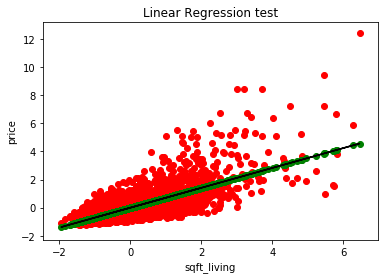

In [92]:
plt.scatter(x_test , y_test , color = "red")
plt.scatter(x_test,LR_model.predict(x_test),color="green")
plt.title('Linear Regression test' )           
plt.xlabel('sqft_living')
plt.ylabel('price')            
plt.plot(x_test,LR_model.predict(x_test),color="black")
plt.show()

In [93]:
from sklearn import metrics
LR_predicted = LR_model.predict(x_test)
print(LR_predicted)
print ("LR MSE  : " , metrics.mean_squared_error(y_test , LR_predicted))
print ( "LR R squared : " , metrics.r2_score(y_test,LR_predicted))

[ 1.34637042  0.51546526 -0.13079431 ... -0.3385206   0.81551434
 -0.63087612]
LR MSE  :  0.4633737030284604
LR R squared :  0.5035535751151092


Conclusion half of the output variation fit on linear regression model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
x = kc_house[['sqft_living' , 'grade']]. values[:,np.newaxis]
y = kc_house ['price'].values

x_train, x_test, y_train , y_test , = train_test_split(x,y,test_size =0.2,random_state=40)